In [1]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import simpson
from scipy.ndimage import gaussian_filter
from wigner_from_data import wigner_from_data

# Task A

## Utility Functions

In [2]:
#utility functions for affine distortions
#affinely distort wigner function
def affine_distort(wigner, alpha, b):
    return alpha*wigner+b

#add gaussian noise to wigner function
def add_gaussian_noise(wigner, sigma):
    noise = sigma*jax.random.normal(jax.random.key(0), wigner.shape)
    return jnp.add(wigner, noise)

def add_affine_gaussian_noise(wigner, alpha, b, sigma):
    #add afine first
    affine_wigner = affine_distort(wigner, alpha, b)
    #add gaussian noise
    return add_gaussian_noise(affine_wigner, sigma)

#calculate the norm of a wigner function
def integrate_wigner(wigner, x, y):
    return simpson(simpson(wigner, y), x)

#calculate the b value of the affine distortion
def recover_affine_offset(wigner):
    x_len, y_len = wigner.shape
    #assuming the corners don't make too much of a difference
    return 0.25*(jnp.mean(wigner[0,:]) + jnp.mean(wigner[x_len-1,:]) + jnp.mean(wigner[:,0]) + jnp.mean(wigner[:,y_len-1]))

#calculate the alpha value of the affine distortion
def recover_affine_scaling(zeroed_wigner, x, y):
    return integrate_wigner(zeroed_wigner, x, y)

#remove the affine distortion of a wigner function
def remove_affine_distortion(affine_wigner, x, y):
    b = recover_affine_offset(affine_wigner)
    zeroed_affined_wigner = affine_wigner - b
    alpha = recover_affine_scaling(wigner, x, y)
    return zeroed_affine_wigner/alpha

#run the simple affine denoising + gaussian filter pipeline
def remove_affine_gaussian_noise(noisy_wigner, x, y, sigma):
    #remove affine noise
    affine_less_wigner = remove_affine_distrotion(noisy_wigner, x, y)
    #apply gaussian filter
    filtered_wigner = gaussian_filter(affine_less_wigner, sigma)
    return filtered_wigner

## Benchmarking

In [9]:
#give an input state
#the benchmark will compare the reconstruction pipeline for noisy and simply denoised data
def affine_only_benchmark(reference_state, max_alpha, max_b):
    #setup the references/truths
    reference_dm = dq.todm(reference_state)
    x, y, reference_wigner = dq.wigner(reference_state)

    #add noise to the wigner function
    v_alpha = np.linspace(0, max_alpha, 5)
    v_b = np.linspace(0, max_b, 5)
    noisy_wigner_stack = add_affine_gaussian_noise(reference_wigner, v_alpha, v_b, 0)
    #reconstruct from noisy data
    noisy_rho_stack = wigner_from_data(noisy_wigner_stack, x, y, 5)
    noisy_fidelity = dq.fidelity(reference_dm, noisy_rho_stack)

    #denoise
    denoised_wigner_stack = remove_affine_gaussian_noise(noisy_wigner_stack, x, y, 0)
    #reconstruct from denoised data
    denoised_rho_stack = wigner_from_data(denoised_wigner_stack, x, y, 5)
    denoised_fidelity = dq.fidelity(reference_dm, denoised_rho_stack)


    return fidelity



SyntaxError: invalid syntax (3973140369.py, line 3)

In [10]:
def gauss_only_benchmark(reference_state, max_noise_sigma, max_filter_sigma):
    #setup the references/truths
    reference_dm = dq.todm(reference_state)
    x, y, reference_wigner = dq.wigner(reference_state)

    #add noise to the wigner function
    v_noise_sigma = np.linspace(0, max_noise_sigma, 5)
    noisy_wigner_stack = add_affine_gaussian_noise(reference_wigner, 1, 0, v_noise_sigma)

    #reconstruct from noisy data
    noisy_rho_stack = fit ...
    noisy_fidelity = dq.fidelity

    #denoise
    v_filter_sigma = np.linspace(0, max_filter_sigma, 5)
    denoised_wigner_stack = remove_affine_gaussian_noise(noisy_wigner_stack, x, y, v_filter_sigma)
    #reconstruct from denoised data

    
    
    
    return fidelity

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [2]:
from wigner_from_data import wigner_from_data

In [2]:
test_fock = dq.fock(5, 1)
fock_wigner = dq.wigner(test_fock, npixels=10, xmax=2, ymax=2)

In [3]:
test_dm = wigner_from_data(fock_wigner[2], fock_wigner[0], fock_wigner[1], 5)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 11 03:02:47 AM: Your problem has 25 variables, 26 constraints, and 0 parameters.
(CVXPY) May 11 03:02:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 11 03:02:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 11 03:02:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 11 03:02:47 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 11 03:02:47 AM: Compiling problem (target solver=MOSEK).
(C

In [4]:
dq.fidelity(test_fock, test_dm)

Array(0.23875694, dtype=float32)

In [5]:
reference_dm = dq.todm(test_fock)
x, y, reference_wigner = dq.wigner(test_fock)

#add noise to the wigner function
v_alpha = np.linspace(0, 3, 5)
v_b = np.linspace(0, 0.5, 5)
#noisy_wigner_stack = np.array([add_affine_gaussian_noise(reference_wigner, alpha, b, 0) for alpha in v_alpha for b in v_b])
#reconstruct from noisy data
#noisy_rho_stack = wigner_from_data(noisy_wigner_stack, x, y, 5)
#noisy_fidelity = dq.fidelity(reference_dm, noisy_rho_stack)
#plt.plot(v_alpha, noisy_fidelity[:, 0])

noisy_wigner_stack = []
for alpha in v_alpha:
    b_noisy = []
    for b in v_b:
        temp_noisy_wigner = add_affine_gaussian_noise(reference_wigner, alpha, b, 0)
        b_noisy.append(temp_noisy_wigner)
    noisy_wigner_stack.append(b_noisy)
noisy_wigner_stack = np.array(noisy_wigner_stack)

NameError: name 'add_affine_gaussian_noise' is not defined

In [5]:
noisy_rho_stack = []
for i in range(len(noisy_wigner_stack)):
    b_rhos = []
    for j in range(len(noisy_wigner_stack[i])):
        temp_noisy_rho = wigner_from_data(noisy_wigner_stack[i,j], x, y, 5)
        b_rhos.append(temp_noisy_rho)
    noisy_rho_stack.append(b_rhos)
        
noisy_rho_stack

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) May 11 02:42:12 AM: Your problem has 25 variables, 26 constraints, and 0 parameters.
(CVXPY) May 11 02:42:12 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 11 02:42:12 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 11 02:42:12 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 11 02:42:12 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 11 02:42:12 AM: Compiling problem (target solver=MOSEK).
(C

[[array([[ 1.72585900e-01+0.00000000e+00j, -1.63973993e-02-1.63974200e-02j,
          -1.56766252e-08+2.35165023e-01j,  7.95625450e-03-7.95619625e-03j,
          -3.76309015e-02-1.29263580e-08j],
         [-1.63973993e-02+1.63974200e-02j,  4.03738618e-01+0.00000000e+00j,
          -2.23452387e-02-2.23452800e-02j,  5.33939649e-09+1.95881002e-01j,
           3.57605734e-03-3.57603646e-03j],
         [-1.56766252e-08-2.35165023e-01j, -2.23452387e-02+2.23452800e-02j,
           3.20435187e-01+0.00000000e+00j, -1.08421726e-02-1.08422182e-02j,
          -1.41952636e-08+5.12757666e-02j],
         [ 7.95625450e-03+7.95619625e-03j,  5.33939649e-09-1.95881002e-01j,
          -1.08421726e-02+1.08422182e-02j,  9.50351840e-02+0.00000000e+00j,
          -1.73514224e-03-1.73514187e-03j],
         [-3.76309015e-02+1.29263580e-08j,  3.57605734e-03+3.57603646e-03j,
          -1.41952636e-08-5.12757666e-02j, -1.73514224e-03+1.73514187e-03j,
           8.20510977e-03+0.00000000e+00j]]),
  array([[ 0.22494

In [6]:
fidelities = []
for i in range(len(noisy_rho_stack)):
    b_fidelities = []
    for j in range(len(noisy_rho_stack[i])):
        temp_fidelity = dq.fidelity(reference_dm, noisy_rho_stack[i][j])
        b_fidelities.append(temp_fidelity)
    fidelities.append(b_fidelities)

[Array(0.40373862, dtype=float32), Array(0.04715316, dtype=float32), Array(0.0495807, dtype=float32), Array(0.05166318, dtype=float32), Array(0.05955893, dtype=float32)]
[Array(0.40373862, dtype=float32), Array(0.04715316, dtype=float32), Array(0.0495807, dtype=float32), Array(0.05166318, dtype=float32), Array(0.05955893, dtype=float32)]
[Array(0.40373862, dtype=float32), Array(0.04715316, dtype=float32), Array(0.0495807, dtype=float32), Array(0.05166318, dtype=float32), Array(0.05955893, dtype=float32)]
[Array(0.40373862, dtype=float32), Array(0.04715316, dtype=float32), Array(0.0495807, dtype=float32), Array(0.05166318, dtype=float32), Array(0.05955893, dtype=float32)]
[Array(0.40373862, dtype=float32), Array(0.04715316, dtype=float32), Array(0.0495807, dtype=float32), Array(0.05166318, dtype=float32), Array(0.05955893, dtype=float32)]


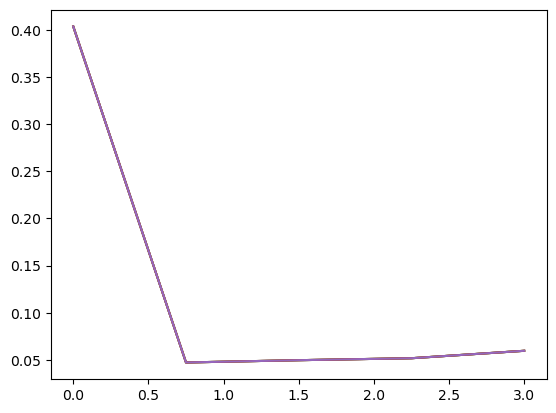

In [7]:
for alpha in fidelities:
    print(alpha)
    plt.plot(v_alpha, alpha)
plt.show()